# Introduction
___

The goal of this Laboration is to investigate how machine learning models can be implemented, tested and enhanced in order to increase there ability to accurately classify target variable,
by either tuning the hyper parameters of the models or by manpulating the dataset it self.  

Six machine learning models will be constructed using the scikit-learn machine learning library.
All the data used for classification comes from the 'Cardiovascular Disease dataset' (Ulianova Svetlana, 2019) from the data repository Kaggle (kaggle.com, 2025) .

The Presence or absence of cardiovascular disease is the target variable that the models are trying to classify, using the data from the aforementioned dataset. The limited number of observation in the dataset and the limited processing power of the hardware being used will also be taken in to account during this Laboration. 

# Data Analysis (EDA) 
___

EDA (Exploratory Datat Analysis) is the process of examining the data to gain further insights that can help with deciding which features should be used for training the models and which features should be discarded. There are other benefits as well, examining the distributions can help with deciding on the type of machine learning model to use as different models excel att different types of of distributions.

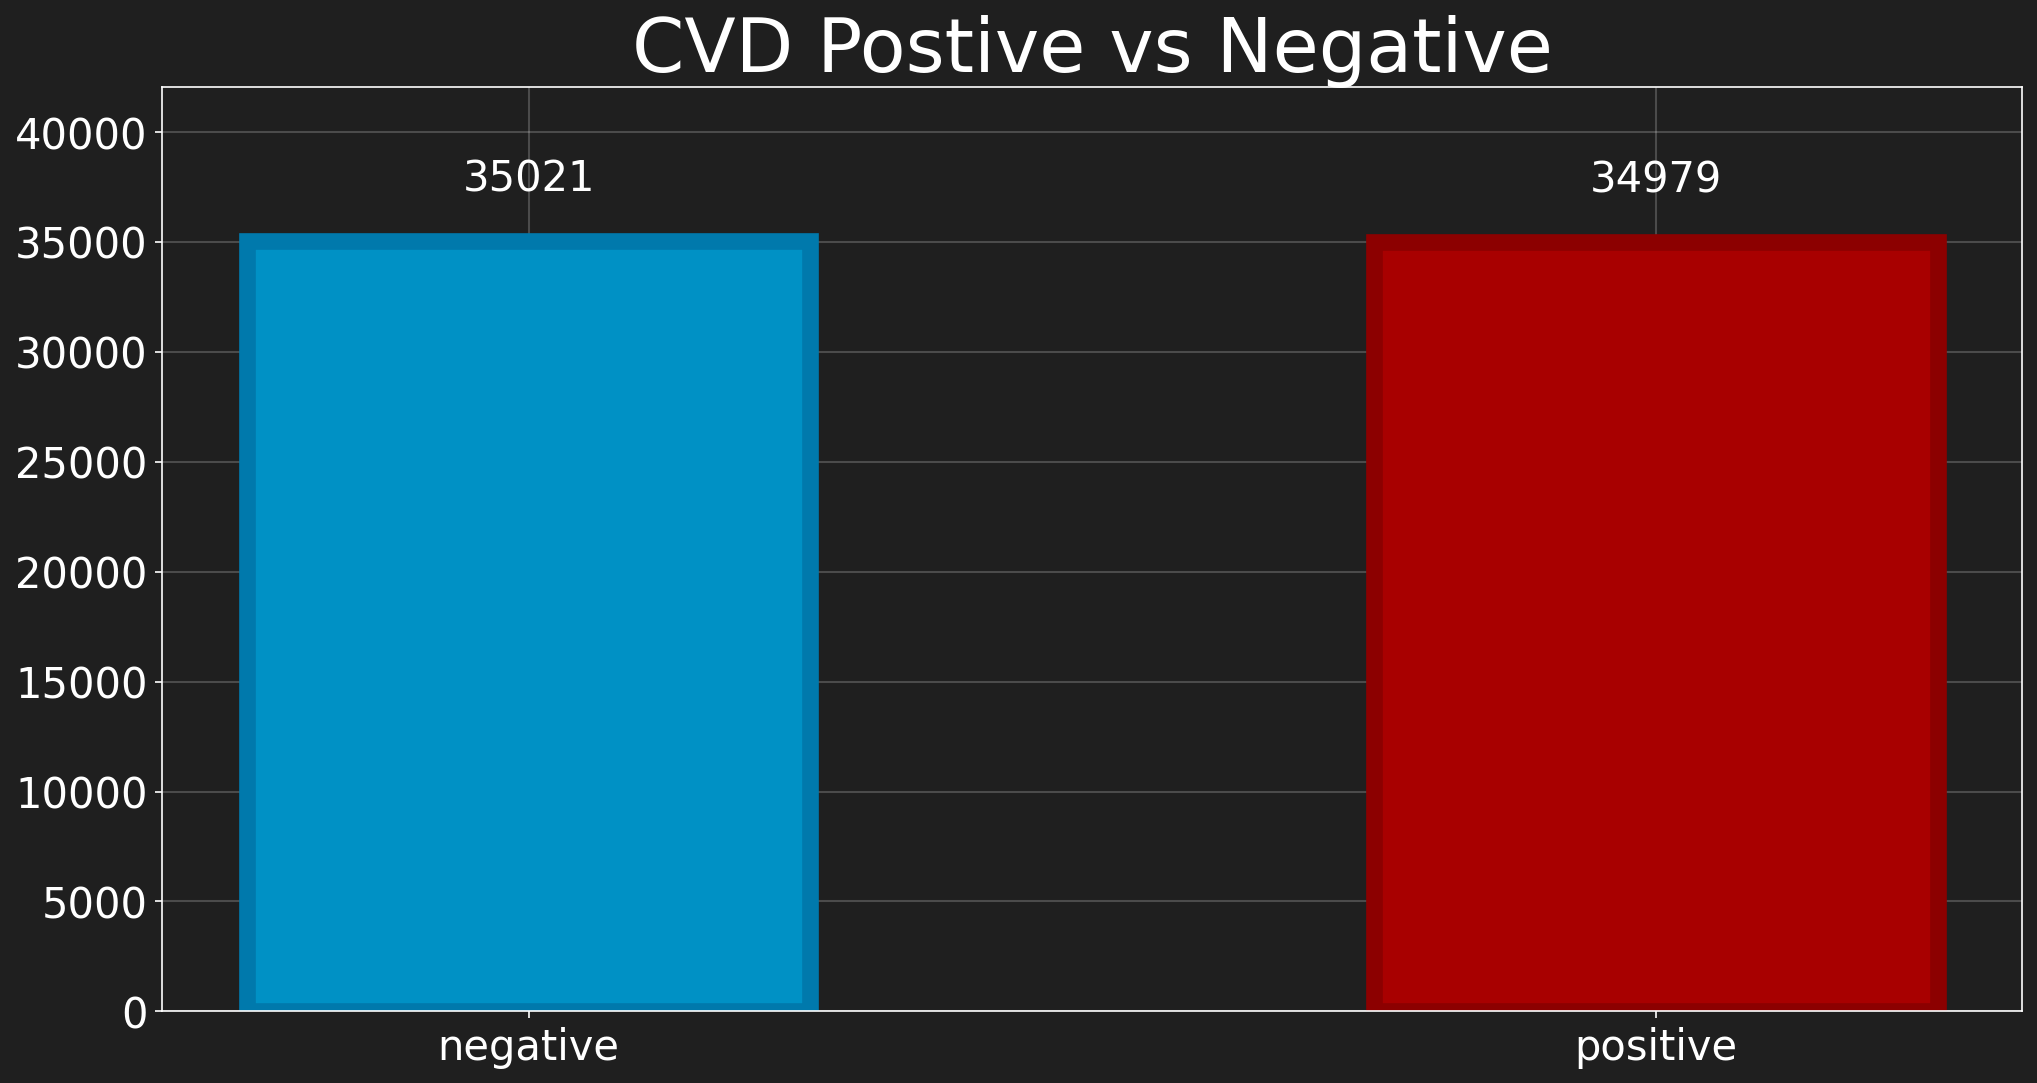

In [1]:
import eda
import pandas as pd
from mpl_style_sheet import style_sheet, cpa
import matplotlib.pyplot as plt

path = "data/"
df = pd.read_csv(path+"cardio_train.csv", sep=";")
df.drop(columns="id", inplace=True)

for key, val in style_sheet.items(): plt.rcParams[key]=val

eda.plot_cvd(df, plt, cpa)

 35021 patients have tested negative and 34979 have tested positive for CVD, this is a near 50/50 split. Having balanced data, from the perspective of machine learning, is a good thing as it tends to produce more accurate results.

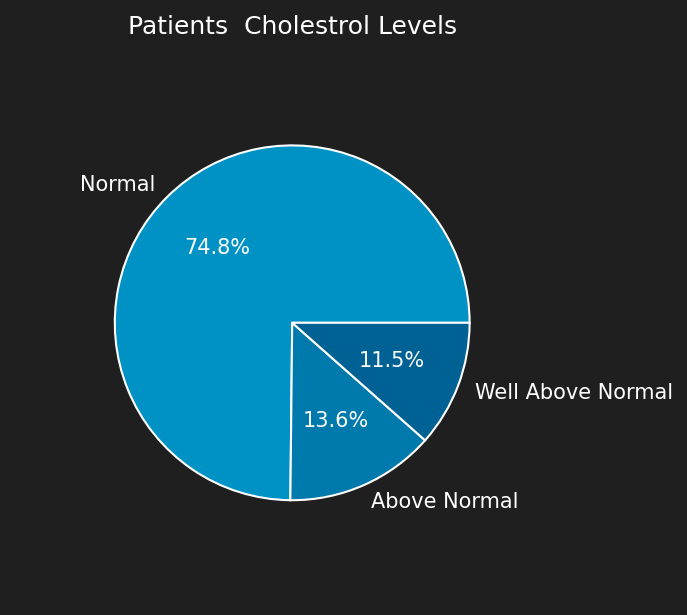

In [2]:
eda.plot_cholestorol(df, plt, cpa)
       

By definition most patient should have normal levels of cholesterol and this pie chart confirms this assumption with 74.8% being a clear majority.
However the "Above Normal" (13.6%) category is almost the same size as the "Well Above Normal" (11.5%) which is a bit surprising as it does not indicate a geometric nor a binomial distribution, in both cases "Well Above Normal" would have been a lot smaller.

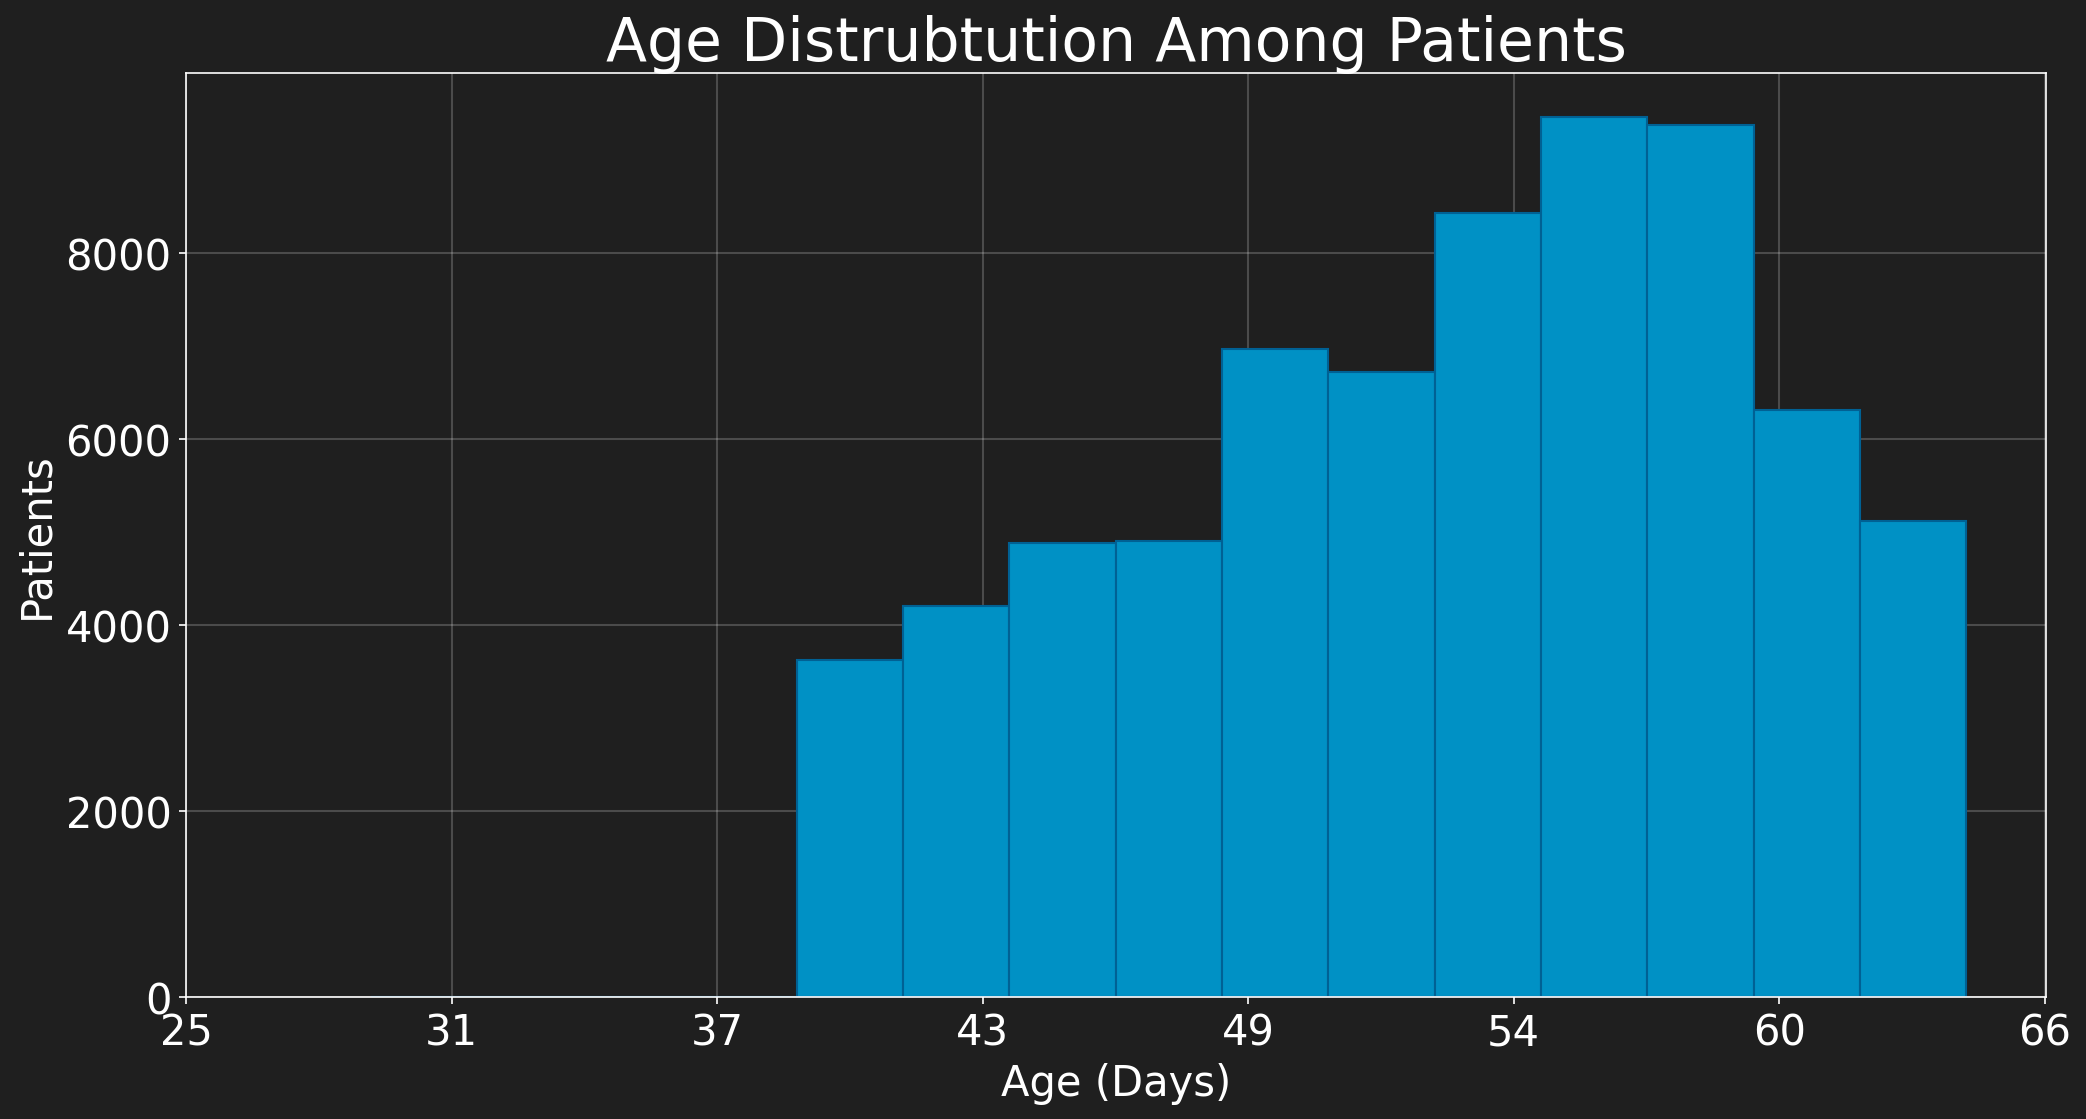

In [3]:
eda.plot_age(df, plt, cpa)


The patients are all between 38 and 65 years of age. Without having any information about how the data was collect its very difficult to discern any meaning from this age distribution. But, for what ever reason these patients where selected, there age do appear to follow a to gamma distribution as the mean skews to the right of the distribution.

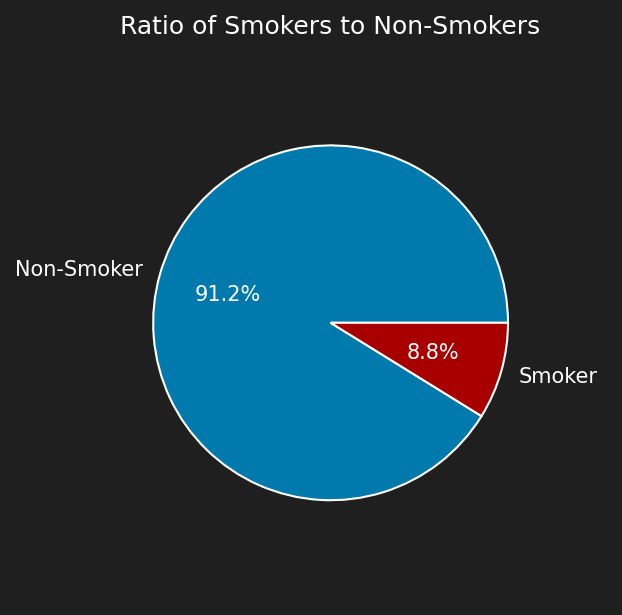

In [4]:
eda.plot_smoke(df, plt, cpa)

Only 9% of the patients are smokers, this will make it harder to draw any conclusions about the effect smoking has one CVDs. This might not have posed such a big problem if the dataset had been larger, in that case multiple random samples could have been extracted from both the smokers and non-smokers and then compared against each other thus minimizing the effect of the uneven distribution. But in this case, with only around 6k smokers in total, the sample sizes is likely to small to produce reliable results.

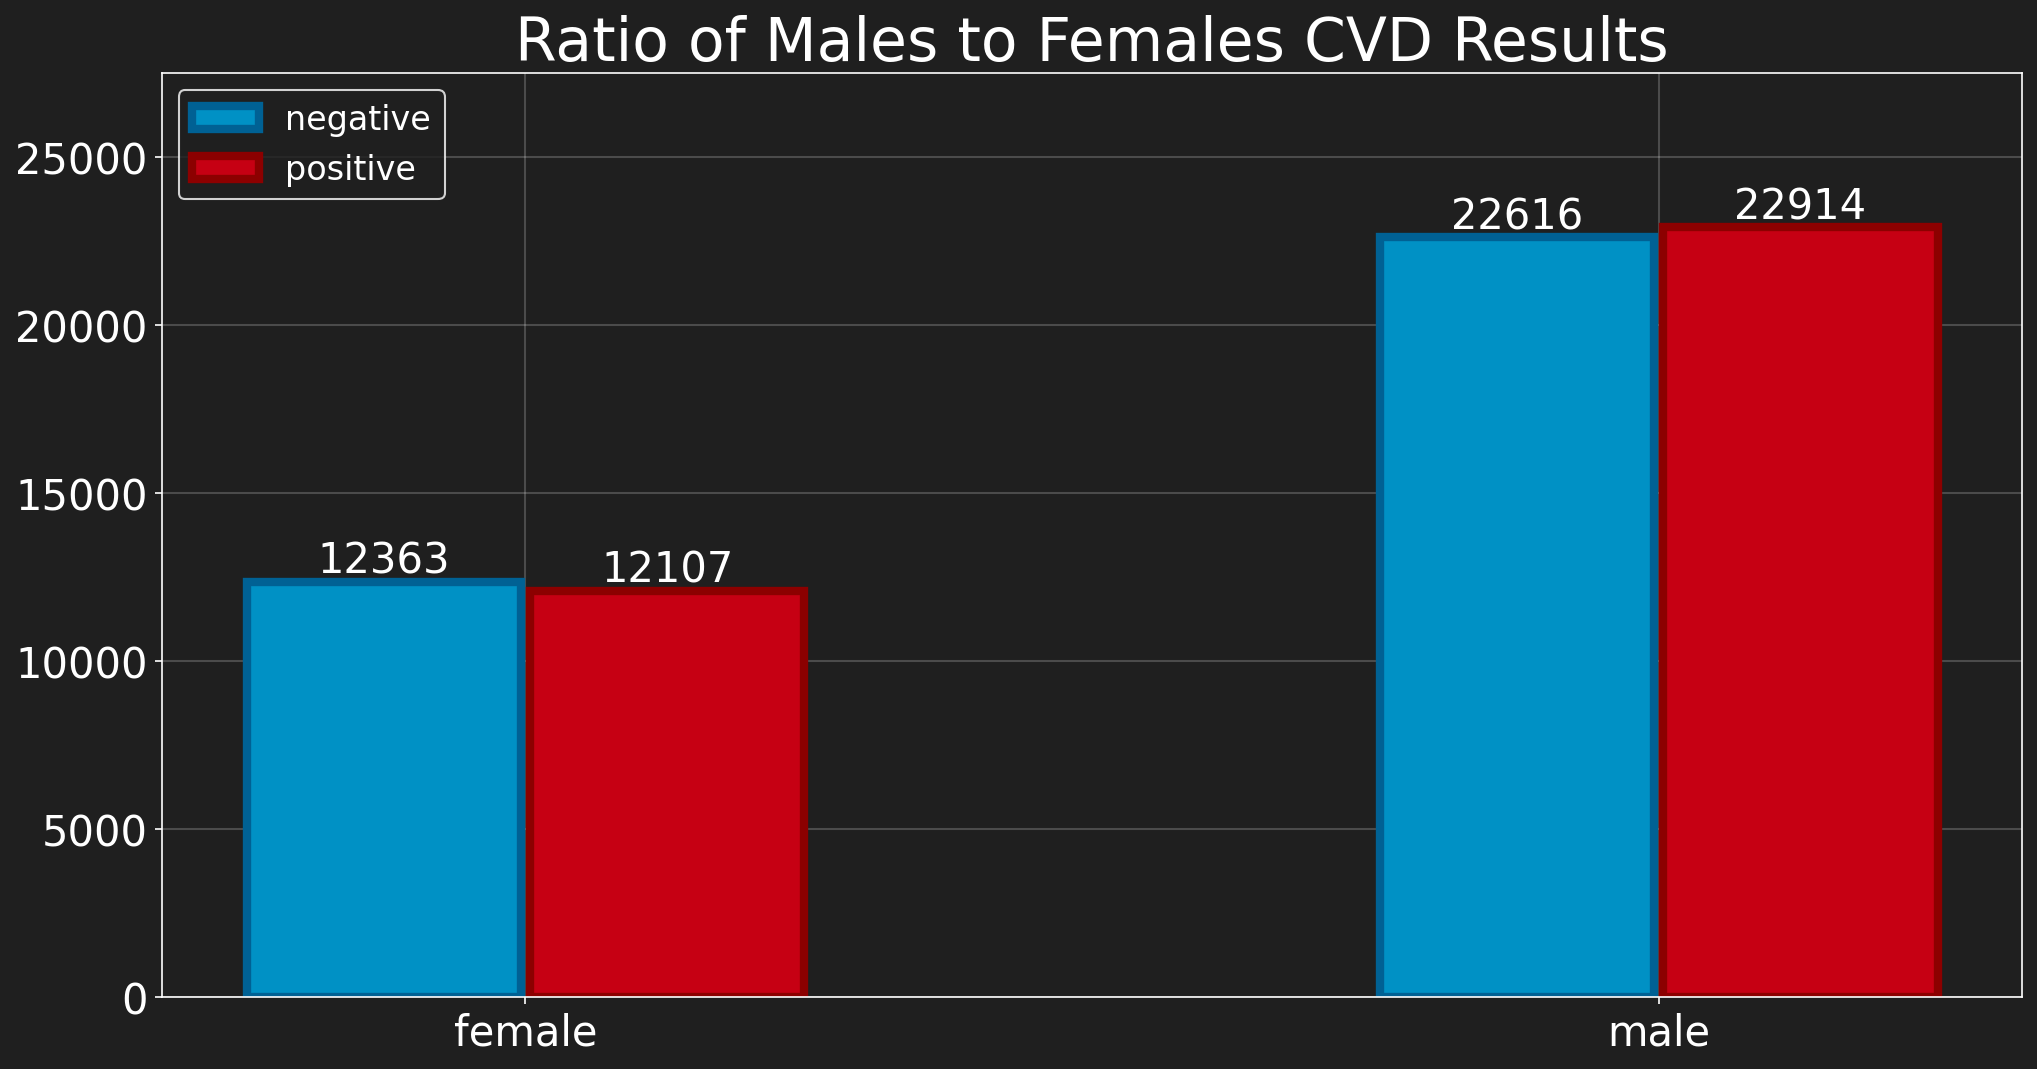

In [5]:
eda.plot_gender(df, plt, cpa)


In this sample the chances of testing positive for CVD is very even between the genders but the male patients are slightly more likely while female patients are slightly less likely to be given a positive diagnosis. This bar plot also implies a selection bias as in most cases random sample from a population would likely produce an even distribution between the genders. 

# Feature Engineering
___

The machine learning models will only be as good as the data there being trained on. To increase the accuracy of the models, features can be removed or combined based on there correlation between each other and the target. Including features with high correlation to the target will often result in higher degree of classification accuracy. Excluding features that have a high correlation between each other can reduce redundancy, increase performance and give a more fair estimations of coefficients. 

However its important to note that features that seem un correlated with the target can have there correlation "hijacked" by other features, some models can also find more correlation for such features for example by combining them with non-linear formulas, so it can be worth testing all of features regardless of the correlation found during EDA.

The heat map is a good tool to find correlations between the features them selves and the target:

In [6]:
df = eda.bmi(df)
df = eda.blood_preassure(df)


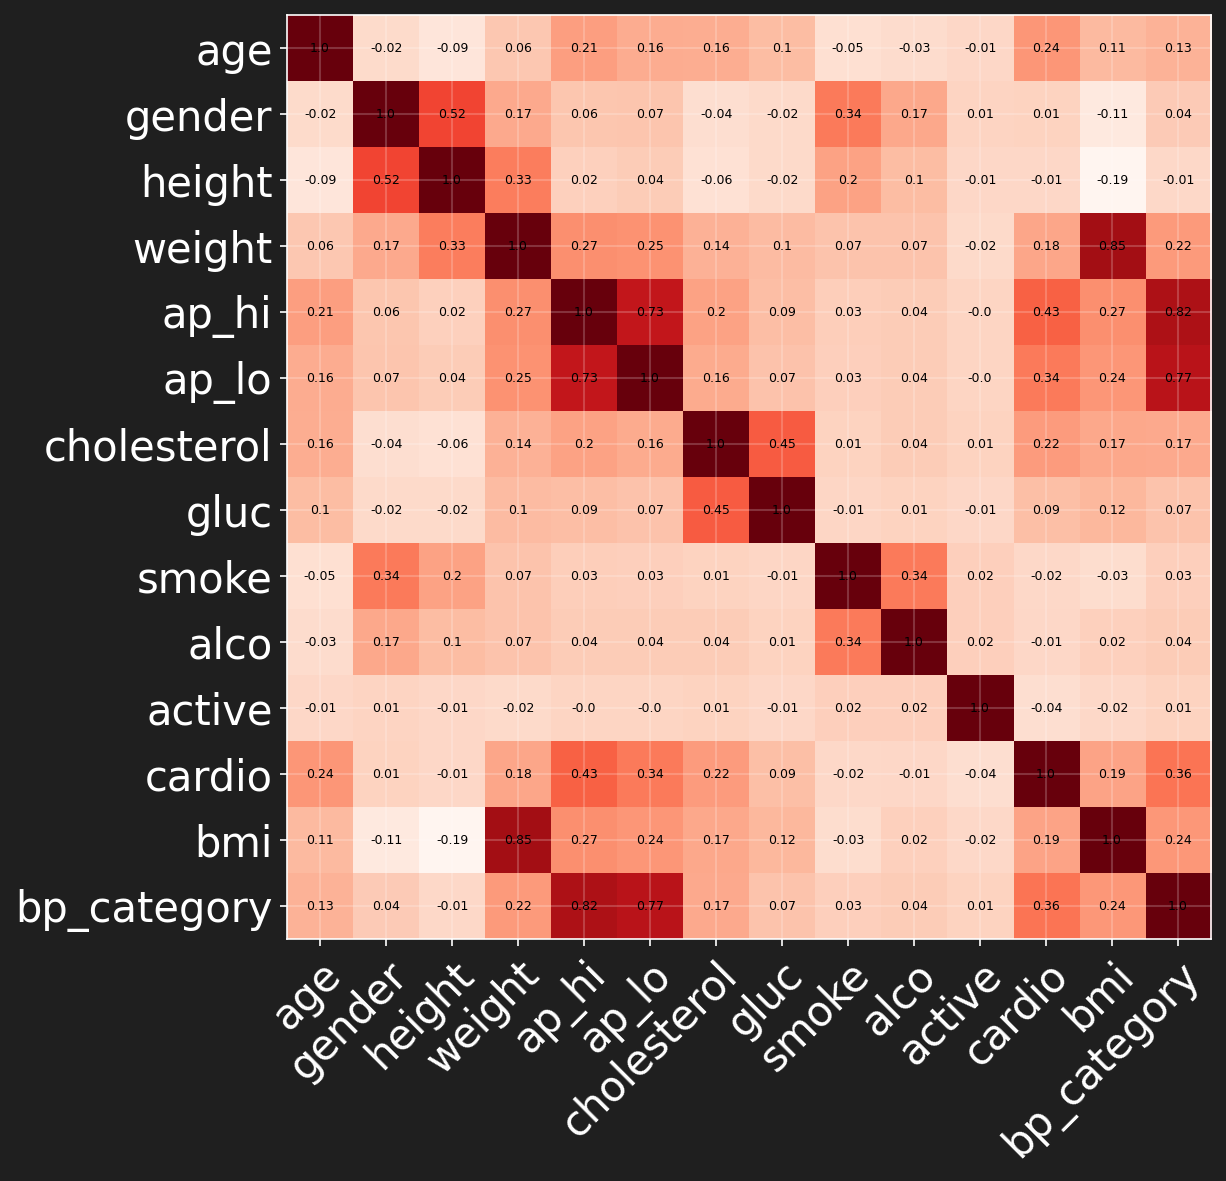

In [7]:
eda.plot_heatmap(df, plt, drop="bmi_category" )


There is no feature that has a high correlation with the target (cardio) if such a feature existed then it might have been the only feature needed for training the models.

Age has one of the highest correlation with the target at 0.24 making it a valid candidate.

Gender has almost no correlation with the target and should be removed to reduce noise.

Weight have some correlation with the target at 0.18 but it also has some correlation with Height but this have been solved by combining them in to one new feature, BMI.

Systolic (ap_hi) and  Diastolic (ap_low) blood pressure have the strongest correlation with the target but they also have very strong correlation with each other so these two features have also been combined in to the new feature bp_category.

Cholesterol also have some correlation with the target so it should likely be included but it has correlation with glukos (gluc) but as this feature has very low correlation with the target it can be removed.

It seems a bit surprising that smoking (smoke), alcohol (alco) and exercise (active) have little to no correlation with the target. Lets examine this with some subplots.

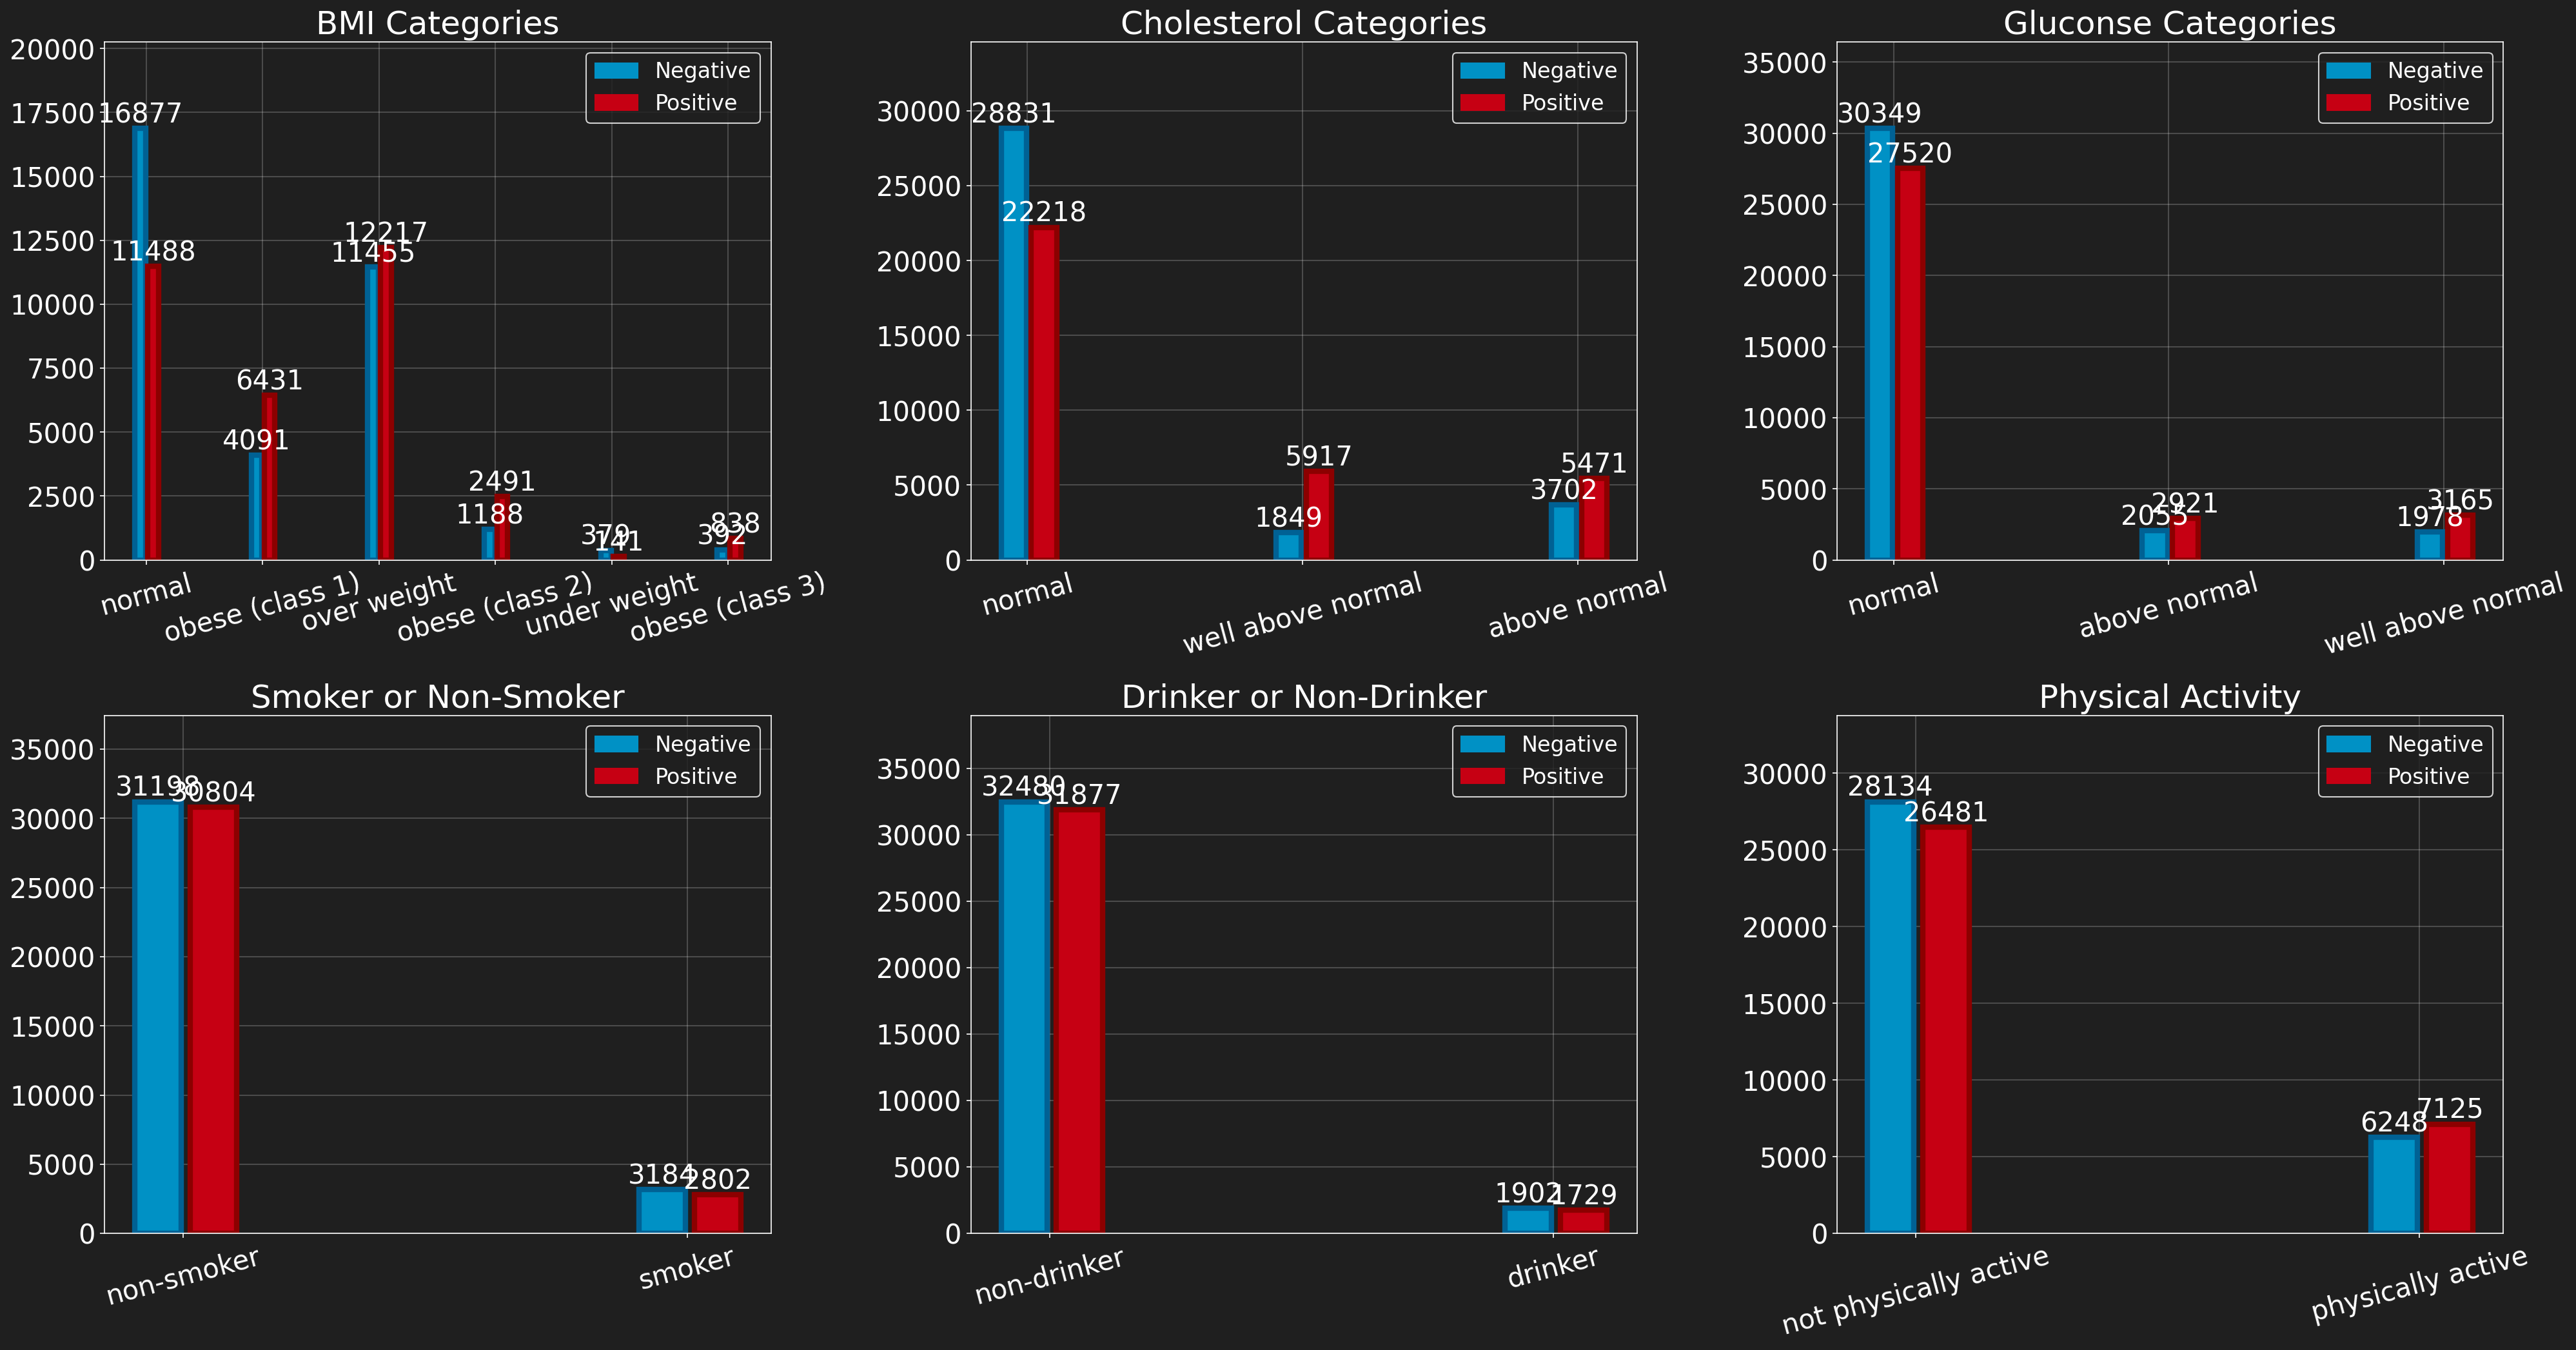

In [8]:
eda.plot_subpots(df, plt, cpa)

As can be seen, smoking, drinking and glucose are heavily unbalanced features and this might be the reason for why we don't see much correlation. Cholesterol and physical activity is less unbalanced but of these two only cholesterol seem to have correlation with the target. 
So it could be that life style does not have that great of an impact on
the CVD, or it could be, as we see, that the data is to unbalanced to give us accurate results or it could be that other features such as blood pleasure hides the true impact of these features. 

Having access to patient data from past centuries when smoking and drinking might have been more prevalent, could have given more accurate estimation of correlation between these two features and the target variable.

### Body Mass Index (BMI)

To create a BMI feature height and weight can be combined using this formula 

$$ \frac{weight}{(height/100)^2}$$
(Trefethen Nick, Prof. Numerical Analysis, Publication: Economisst, 2013, Link: people.maths.ox.ac.uk/trefethen/bmi.html)

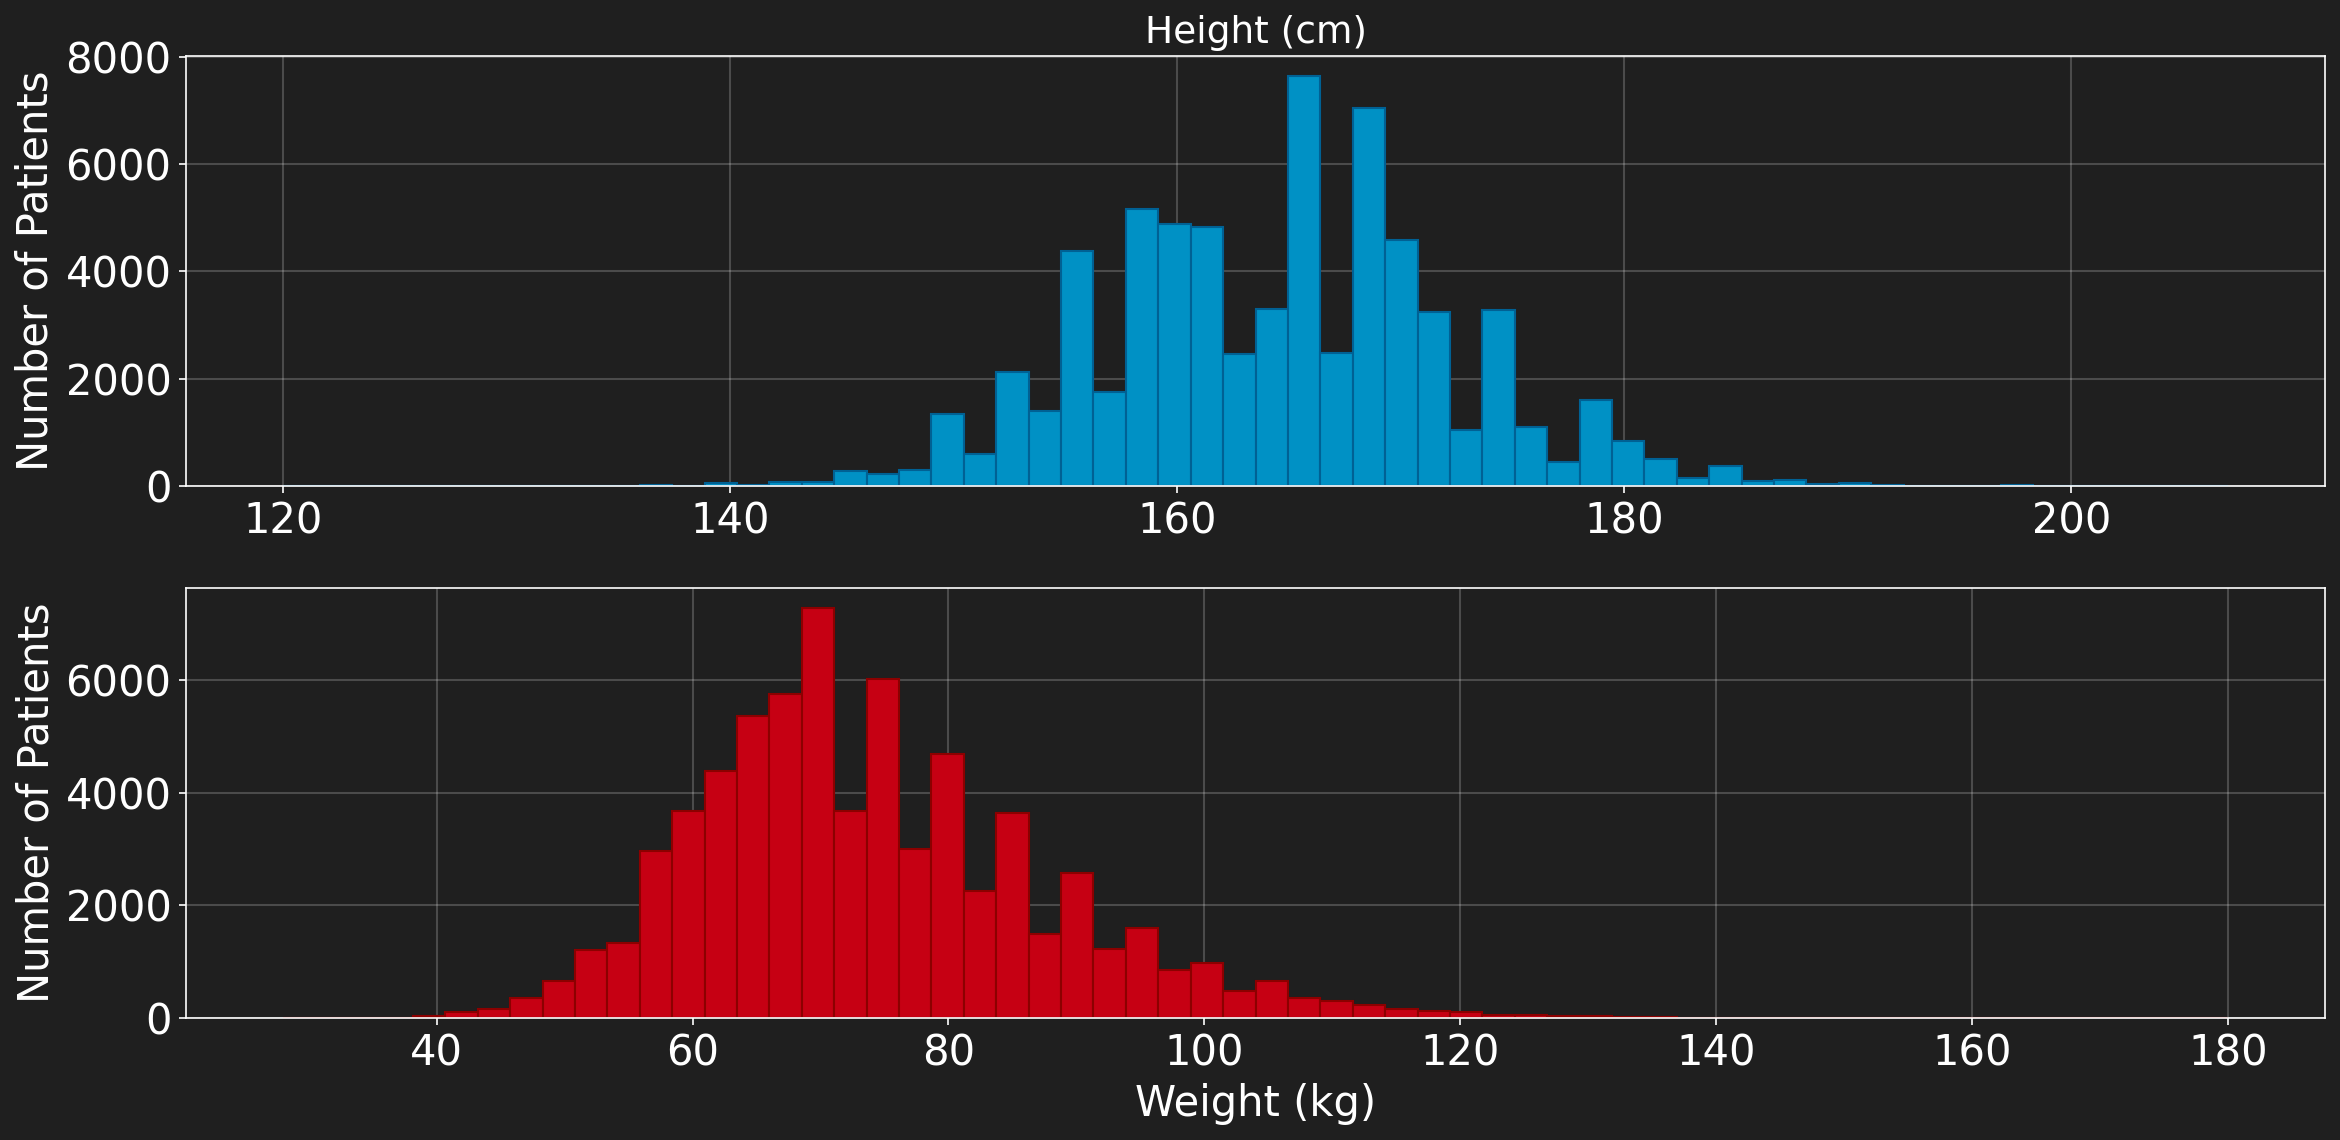

In [9]:
eda.plot_height_weight(df, plt, cpa)

Height and weight are fairly close to normal distribution which would suggest that they would work well with a linear model. A linear does not necessarily produce better results than non-linear model but they tend to be simpler to implement and demande less resources to run. 

Height, as havs been observed with the heatmap, is correlated with CVD but there also correlated with height which is generally a bad thing but this can be mitigated by combining them in to one feature BMI, this could also increase the correlation making the combination of the two features greater then the sum of there parts.

##### Dealing with Errors and Outliers

To increase the accuracy of our models errors and outliers can be removed.

This dataset contains errors, data that is either wrong or that has been inputted incorrectly so extreme values will be removed to minimize the impact of this false data. 

By reducing outliers error values that could severely influence the training of the models are removed. Some true outliers may also be purged, this makes our models, likely, more accurate but narrows the range of observations that can be classified with certainty, so this is a trade off. Also note that some models are more sensitive to outliers then others.

To be able to remove errors and extreme outliers a reference is needed, 
this reference will come from data collected from 2011 to 2014 in American males and females above the age of 20. However there is no evidence to link the data to America specifically, this data can come from any time or place.

(U.S Department of Health and Human Services, Publication: Anthropometric Reference Data for Children and Adults: United States, 2016, Link : https://www.cdc.gov/nchs/data/series/sr_03/sr03_039.pdf)

The 5th percentile at around 20 BIM and 95th percentile around 40 BMI with the 50th percentil att around 28 BMI, men nd women have similar enough percentiles, had more been known about the 'Cardiovascular Disease dataset' accounting for the small difference between the genders could have been considered but with the arbitrary nature of the dataset such an exercise is likely to have little impact on the over all accuracy of the models.

To account for some outliers the 5th and 95th percentile will be multiplied by 0.8 and 1.2 respectively aka 20. Which produces a 
range of 16 to 48. Why 0.8 and 1.2? Through experimentation different values this interval seemed to remove a reasonable amount of observation but it is an arbitrary number.

### Blood Preasure

To calculate the blood pressure categories 
(Holland Kimberly, 2020, Article: Everything You Need to Know About High Blood Pressure (Hypertension), Link: healthline.com/health/high-blood-pressure-hypertension#causes)

Diastolic feature was first scaled up to 1.65 in order to have the same weight as the Systolic feature, they where then combined in to one value, the same process was applied to the categories. The categories was then assigned with the use of the dictionary keys in combination with an if statement

Outliers where removed before these two features where combined, the same method was used as for the BMI. The percentiles where provided by

(Bonge Atanasia, Kazembe Lawrence, Pazvakawambwa Lillian, Article: 
Centile estimation of blood pressure by age and sex for adults aged 35-64 in Namibia, Link: https://uaps2024.popconf.org/uploads/191489) 

Because we don't no where the patients of dataset are from the country where the percentiles are from are largely arbitrary the utility of these percentiles is to give a base for removing of outliers and spot errors. 

The Systolic distribution is a bit skewed 

Systolic
25th around 115 
50th around 125
99th around 185

The Diastolic is more similar to a normal distribution

Diastolic
25th around 75
50t around  90
99th around 110

Again, arbitrary values have been found through experimentation to remove what seems to be a reasonable amount of outliers. It's worth noting that such arbitrary decisions is often taken when working with machine learning data as there might exists no reference for the data and its left to whomever is implementing the models or data to make such gut decisions .

Systolic interval
99th percentile will be multiplied by 1.1
25th percentile will be multiplied by 0.7

Diastolic interval
99th +20
25th -20

In [10]:
df.shape

(67988, 15)

Total outliers removed from the features Height, Weight, Systolic and Diastolic are 1924 (2.75%)

### Assemble Datasets

The performance of the models are highly dependent on the features there trained on, its difficult to estimate how well combinations of different features will perform. By training the models on different sets with different features the best set can be picked based on performance.   
To sets will be assembled using the following features: 

Dataset 1 contains the features : 
age, gender, height, weight, cholesterol, gluc, smoke, alco, active, bmi, bp_category

Dataset 2 contains the features : 
age, gender, ap_hi, ap_lo, cholestrol, gluc, smoke, alco, active, bmi

In [11]:
from validator import ModelValidator, create_datasets

# Features being included, not dropped
X_labels = [ 
  ["age", "gender", "cholesterol", "gluc", "smoke", "alco", "active", "bp_category", "bmi_category"],
  # Not Included [ "weight", "height", "bmi", "ap_hi", "ap_lo", "cardio"] 
  ["age", "gender", "cholesterol", "gluc", "smoke", "alco", "active", "bmi", "ap_hi", "ap_lo", ] 
  # Not Included [ "weight", "height", "bp_category", "bmi_category", "cardio"]
]
y_labels = [ "cardio", "cardio" ]
onehot = [ ["bp_category", "bmi_category", "gender"], ["gender"] ]
datasets = create_datasets(df, X_labels, y_labels, onehot, size=None)

# Modell 
___

To increase the accuracy of the classifications six models will be chosen and then trained on the both sets, the model set combination that produces the highest score will be used in the final evaluation.

The models where chosen, primarily, to provide the greatest possible variety while still fall inside the range of models commonly used for classification. Some models such as SVC where excluded because of hardware limitations in the test equipment.

What follows are as short explanation on the six models that have been chosen and the hyper parameters that is used during the tuning process.
Note that many of the parameters have been limited or ignored primarily because of hardware constraints, to find the best parameters a greater ranged could have been chosen: 

##### Decision Trees
A Tree-based mode that makes decision in a way not unlike a big nested if else statement.
- `criterion ["gini", "entropy"]`
	  This determines how the model splits the data at each node.
	  Gini is often used for classification as it measures the probability of misclassification. 
	  Entropy also common for classification and it measure the disorder or uncertainty of the data.
	  We also have Squared Error, Absolute Error and Friedman MSE, but these are skipped because there primarily used for regression. 

- `max_depth [3,6,9,12,15]` 
	This limits how deep the tree can grow, the deeper the tree the more complex it is which reduces the chance for overfit but it might also lose some of the relevant information.

 - `min_sample_split [2,4,8,10]
	Determines how many samples are required to split an internal node. A high value prevents the tree from creating very small nodes which can lead to overfitting, in a sens it smooths out the decision boundaries.

- `min_sample_leaf [1,3,6]`
	Sets the minimum number of samples required for a leaf node
	This might sound very similar to *Mini Sample Split* and it is, they both help to prevent overfitting by ensuring that the nodes don't get to small. The key difference is that a leaf is an end node so `Mini Sample Leaf` can prevents `Mini Sample Split` from splitting  an internal node in to two leaf nodes if the leaf nodes gets to small.

- `max_features [sqrt, log2, None]`
	Limits the number of features considered when searching for the best split. 
	Sqrt = $\sqrt{d}$
	Log2 = the base-2 logarithm of $d$
	None = $d$
	
	
- Best Combination
	`dataset_2, max_depth[9,12], min_sample_leaf[6], min_sample_split[10] criterion["entropy"]
	`md` is in the middle during two runs it shifted between 9 and 12 of the range but `msl` and `msl` both used the maximum so the ranges could be increased.

##### Gradient Boosting
Ensemble of decisions trees.
- `n_estimators [100, 200, 300]`
	 Represents the number of boosting steps aka how many sequential trees the algorithm will create in order to try and correct errors.  So the higher the number of `n_estimators` the more complex patterns the model can learn, but this will come computational cost and can also increase the chance for overfitting.

- `learing rate [0.01, 0.1, 0.2]`
	The lower the learning rate the less each tree will contribute to the classification decision, this can reduce the risk of overfitting. With a higher learning rate the model will learn more quickly but also have higher chance to overfit.
	*Learning Rate* and *The Number of Estimators* often go hand in hand as the number of estimators increases the learning rate needs to be lowered to prevent overfitting.

- Best Combination
	`dataset_2, n_estimators[300], learning_rate[0.2]`
	`n_estimators` and `learning_rate` reach ither maximum so the ranges should be increased.
  
##### K-Nearest Neighbors
A non-parametric model that determines the class base on the class of of the data points closest neighbors, good on low dimensional datasets such as these. 

- `n_neighbors [1, 2, 3, 5, 8, 13]`
	The most important hyper parameter for KNN is arguably how many neighbors to chose from, to few neighbors can lead to overfitting, to many can lead to a heigh bias. 13 is not necessarily a high number but the more neighbors the higher the computation time. Smaller steps will also increase computation time but would increase the chances  to produce a more accurate model.
	Other hyper parameter exists like weights, the father away a neighbor is the less impact it will have on the classification. 

- Best Combination
	`dataset_2, n_neighbors[13]`
	Reached its maximum so the range should be increased.
  
##### Logistic Regression
A linear model for classification, good for simple classification tasks
- `C [0.001, 0.01, 0.1, 1, 10, 100]`
	C effects the regularization strength, a smaller value causes stronger regularization which can lead to underfitting, a larger value causes weaker regularization which can lead to overfitting, so its a tradeoff. 
	
- `solver ["liblinear", "saga"]`
	The choice of solver can effect the speed and convergence of the algorithm.
	`liblinear` tends to preform better on small dat sets while `saga` usually excels on large data sets.  70k is considered a small sets but for the sake of experimentation `saga` was also chosen.
	
- `max_iter [100, 200, 300]`
	Helps the model converge, if the model does not converge increasing `max_iter` could be the solution

- Best Combination
	`dataset_2, C[1,100], solver["saga", "liblinear"]`
	C switched from 1 to 100 during two different runs so the maximum should be increased, but its interesting that `saga` was picked over `liblinear` in one of the test runs as `liblinear` usually performs better with smaller sets
  
##### Multinomial Naive Bayes
A probabilistic classifier based on Bayes theorem, more commonly used for text classification.

- `alpha [0.1, 0.5, 1.0, 2.0]`
	Generally considered the most important parameter for MNB, `alpha` controls how much smoothing is applied to the features, High `alpha` prevents overfitting but can also smooth out meaning full data. Smoothing also prevents features not observed during training to gain zero probability.

- `fit_prior [True, False]`
	Setting `fit_prior` to True tends to be the best choices if the test data is believed to be accurate representation of the population.
	Basically this allows the model to learn the distribution based on the training data.

- Best Combination
	`alpha[0.1], fit_prior[False]`
	`FP` was set to False which could suggest that the test data was not such a good representation of the training data, alpha had the minimum value so the range should be lowered.

##### Voting Classifier
  The voting classifier lets all the above model cast a vote and then it assigns the class based  on these votes. There are two settings for the VC;  with the Hard Voting setting the class that gets the most vote is picked, with the Soft Voting setting each model returns a probability, the VC then makes the classification based on the average.

### Tuning With Cross Validation   

To tune aka to fined the best hyper parameters for each model sikit-learns Cross Validation method was used. This method is given a set of hyper parameter values and then runs the model with each value combination to find the best model. What follows is the steps taken to find the best data set with the best model with the best hyper parameters.

The Cross Validator has an hyper parameter of its own in the for of CV, this controls how many times to split the training data, more splits tends to provide a more reliable estimate of the model's performance and prevent overfitting. Higher CV significantly increases training time, in this Laboration, what is generally considered the minimum, a CV of 5 was chosen which is not uncommon but 10 CV is also very often used.

1) A nested for loop is implemented, in the first stage loops through the two data sets and splits them into training (70%), validation (15%) and test data (15%). 

2) The Second stage loops through all the models and executes the following steps:
   - `Pipeline` first scales the data and then normalizes it 
   - The model is then added to `GridSearchCV` along with the hyper parameters
   - The parameters are trained and tuned  using the `.fit()` method and the training data
   - The best version aka the version with the best preforming combination of hyper parameters  is extracted with `.best_estimator_`
   - This best version is then used to make classifications using `.predict()` and the validation data
   - This produces $\hat{y}$ which is used in combination with y validation to produce scores of accuracy, recall and precision
   - This best version of the model is add to a list with all the other best versions
   - And lastly the voting classifier utilizes all the tuned models and is then it self added to the list with all the other models.

3) All the best models and dataset pairs are then compared based on either accuracy, recall or precision in order to find the model dataset pair that produces the most accurate classifications.

In [12]:
mv = ModelValidator(datasets)
mv.score_tuning = "accuracy"
mv.verbose = False
mv.initiat_model_tuning()

# Result
___

`score` this is used for categorical targets, you can specify what you're trying to optimize for: 

- precision 
  Optimizes against False Positives, to make only the correct classifications gets through, useful for example in quality control 
  
- recall 
  Optimizes against False Negatives, to make sure that the model doesn't miss anything, useful for example in fire alarm and medical examination 
  
- accuracy 
  Optimized to get as many correct classifications as possible, does not care if  if the model has higher false positives or higher false negatives. 

|              | Positive                                                | Negative                                                  |     |
| ------------ | ------------------------------------------------------- | --------------------------------------------------------- | --- |
| **Positive** | True Positive (TP)<br>Matched Fire<br>Fire Present      | False Negative (FN)<br>Matched No-Fire<br>Fire Present    | 1   |
| **Negative** | False Positive (FP)<br>Matched Fire<br>Fire Not Present | True Negative (TN)<br>Matched No-Fire<br>Fire Not Present | 0   |
|              | 1                                                       | 0                                                         |     |

Which model preforms the best may depend on which scoring method is being used aka what is prioritized, as this is medical data recall would probably be the most appropriate scoring method to minimize the chance of missing a patient with CVD.


##### Round 1 : Accuracy
When the models where tuned for accuracy, the tuning process took 18 minutes and the Voting Classifier, using Dataset 2, had the highest score in all three categories:

| Model             | Dataset | Accuracy | Recall | Precision |
| ----------------- | ------- | -------- | ------ | --------- |
| Voting Classifier | 2       | 72%      | 72%    | 72%       |

##### Round 2 : Recall
When the models where tuned for recall, the tuning process took 20 minutes this time the Logistic Regression, using Dataset 1, had the highest score in all three categories::

| Model             | Dataset | Accuracy | Recall | Precision |
| ----------------- | ------- | -------- | ------ | --------- |
| Voting Classifier | 1       | 70%      | 70%    | 71%       |


##### Round 3 : Accuracy
The second time the models where tuned for accuracy, the tuning process took 19 minutes and  Gradient Boosting achieved the best score, using Dataset 2, this time. 

| Model             | Dataset | Accuracy | Recall | Precision |
| ----------------- | ------- | -------- | ------ | --------- |
| Gradient Boosting | 2       | 72%      | 72%    | 73%       |

So even though high recall was preferred over high accuracy, tuning for accuracy actually gave better results even in recall.

In [20]:
mv.score_evaluation="accuracy"
mv.evaluate_report()



			Model gradient_boosting | Dataset 2

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      5183
           1       0.74      0.69      0.71      5015

    accuracy                           0.72     10198
   macro avg       0.73      0.72      0.72     10198
weighted avg       0.73      0.72      0.72     10198



			Model gradient_boosting | Dataset 2



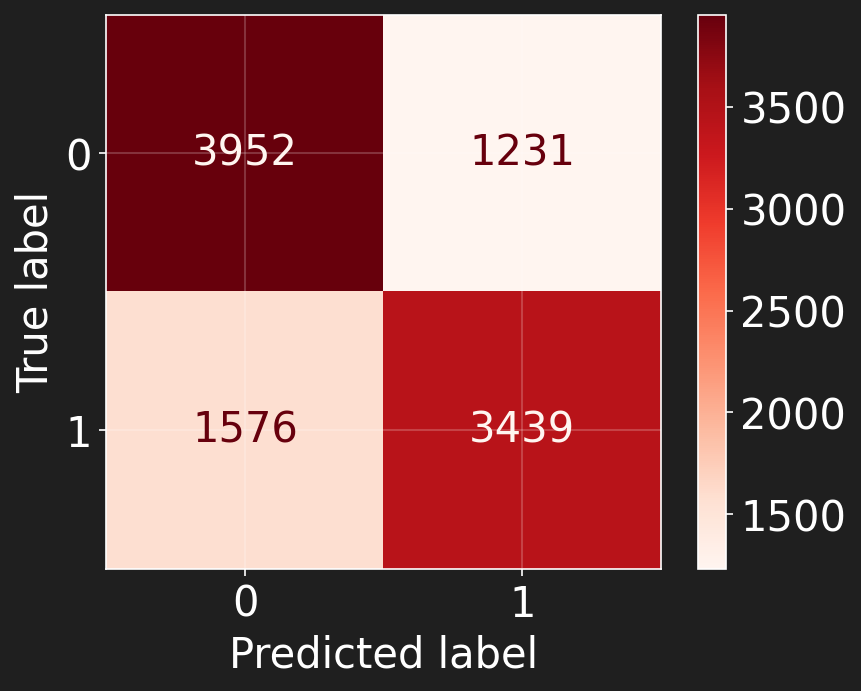

In [17]:
mv.score_evaluation="accuracy"
mv.evaluate_matrix()


# Discussion
___

Having an accuracy of 0.72 is not a great result, anything under 0.8 is, in most situation, an unacceptable result. And in the case of medical data it's likely that an accuracy above .9 would
be needed for the model to be deemed successful.  

But it is worth noting that even with only three test runs three different models came out on top, it would be interesting to see if a large dataset would have resulted in a more stable result. 

Dataset 2 however seemed to be the superior choices as it preformed the best in all three test runs. The differens between Dataset 1 and Dataset 2 is that Dataset 2 did not include the categorical data of Blood Pressure and BMI but instead relied on the continues versions of these features. 

The question is then, what could be done to increase the accuracy of the model?
  
1. Increased Processing Power
	With greater hardware a greater range of hyper parameters could have been tested and perhaps a greater combination of parameters could have been found. This could in turn improve the accuracy of the model. 

2. Feature Expansion
	There might be more correlation hidden in the data, with the use of feature expansion techniques such as increasing dimension, finding interactions between features and applying mathematical function such as logarithms and square roots to existing feature new features may be created that can better denote the target.

3. Testing More Versions of the Data Set 
	Two sets have already been tested but there are many more combinations, functions could have been rigged to, much like cross validation, test different combination of features.

4. Testing More Models
	There are plenty more classifications models to try out, models such as, Support Vector Classification, Random Forest Classifier, Quadratic Discriminant Analysis.

5. Find Better Data
	 The case could also be that we are missing some important feature, there where no clear indication of correlation in the heat map and this could suggest that some important piece of data is simply missing. Perhaps CVD has some genetic component hat can't easily be explained by the currant features, this could account for a huge amount of the correlation. All though one must remember that genetics in some way shape or form, be it directly or indirectly, effects all the features in the dataset, even habitual features such as smoking and drinking may be influenced by genetics.
	 
	 " Data analyses from the 1981 Australian twin panel cohort confirm a positive genetic correlation between regular smoking and the risk of alcohol dependence that remains significant, even when sociodemographic and personality variables as well as histories of other psychopathologies are taken into account. " (Madden Pamela, Bucholz Kathleen, Martin Nicholas, Heath Andrew. National Library Of Medicine Link: https://pmc.ncbi.nlm.nih.gov/articles/PMC6709744/)
	 
	So there is, theoretically, genetic information locked inside the features, and if the hypothetical genetic correlation does exist than perhaps this information could be unlocked with for example feature expansion that where discussed in point 2 or with other even more powerful feature engineering tools. Or one could simply solve it by finding a data set with other features or more observations, that could also be a solution. 